In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_table('diabetesdata.txt')

In [2]:
df.head()

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = df.drop('Diabetes',axis=1)
y = df['Diabetes']
x

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Diabetes, Length: 768, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [8]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=1000) #converge etmezse sayıyı arttır.
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred=logmodel.predict(x_test)

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [12]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [13]:
logmodel.score(x_test,y_test)

0.7857142857142857

In [16]:
logmodel.intercept_

array([-8.39791118])

In [17]:
logmodel.coef_

array([[ 1.34766915e-01,  3.44630520e-02, -1.69047270e-02,
        -4.60018856e-03, -5.93256533e-04,  9.68443266e-02,
         1.13194113e+00,  1.44311067e-02]])

In [19]:
a=pd.DataFrame({"Değer":"intercept","katsayılar":logmodel.intercept_});a

,Değer,katsayılar
0,intercept,-8.397911


In [21]:
b=pd.DataFrame({"Değer":x.columns,"katsayılar":logmodel.coef_[0]});b

,Değer,katsayılar
0,Preg,0.134767
1,Glucose,0.034463
2,BP,-0.016905
3,SkinThick,-0.004600
4,Insul,-0.000593
5,BMI,0.096844
6,DPF,1.131941
7,Age,0.014431


In [26]:
model_coefs=pd.concat([a,b]).reset_index(drop=True);model_coefs

,Değer,katsayılar
0,intercept,-8.397911
1,Preg,0.134767
2,Glucose,0.034463
3,BP,-0.016905
4,SkinThick,-0.004600
5,Insul,-0.000593
6,BMI,0.096844
7,DPF,1.131941
8,Age,0.014431


In [27]:
######matris ile gösterelim

In [29]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_pred);cnf_matrix

array([[92,  8],
       [25, 29]], dtype=int64)

In [30]:
#yukarıdakinin özeti diyabet olmayan 100 kişiden 92 sini doğru bilmiş.

(2.5, -0.5)

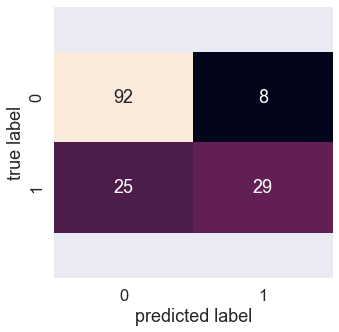

In [40]:
sns.set(font_scale=1.5)
fig=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
plt.xlabel("predicted label")
plt.ylabel("true label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7837837837837838
Recall: 0.5370370370370371


In [42]:
x_test

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age
488,4,99,72,17,0,25.6,0.294,28
413,1,143,74,22,61,26.2,0.256,21
112,1,89,76,34,37,31.2,0.192,23
222,7,119,0,0,0,25.2,0.209,37
711,5,126,78,27,22,29.6,0.439,40
...,...,...,...,...,...,...,...,...
139,5,105,72,29,325,36.9,0.159,28
178,5,143,78,0,0,45.0,0.190,47
654,1,106,70,28,135,34.2,0.142,22
110,3,171,72,33,135,33.3,0.199,24


In [43]:
logmodel.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [44]:
logmodel.predict_proba(x_test)

array([[0.92596294, 0.07403706],
       [0.83105446, 0.16894554],
       [0.95640578, 0.04359422],
       [0.5355489 , 0.4644511 ],
       [0.71029125, 0.28970875],
       [0.77273562, 0.22726438],
       [0.97026162, 0.02973838],
       [0.90291422, 0.09708578],
       [0.22253269, 0.77746731],
       [0.9497691 , 0.0502309 ],
       [0.78023188, 0.21976812],
       [0.9448634 , 0.0551366 ],
       [0.25790591, 0.74209409],
       [0.97025538, 0.02974462],
       [0.95068429, 0.04931571],
       [0.7135159 , 0.2864841 ],
       [0.72184582, 0.27815418],
       [0.47470029, 0.52529971],
       [0.86186677, 0.13813323],
       [0.31590994, 0.68409006],
       [0.25540256, 0.74459744],
       [0.9173185 , 0.0826815 ],
       [0.56295777, 0.43704223],
       [0.97200726, 0.02799274],
       [0.77229887, 0.22770113],
       [0.83249692, 0.16750308],
       [0.52329633, 0.47670367],
       [0.91293443, 0.08706557],
       [0.95057885, 0.04942115],
       [0.93720935, 0.06279065],
       [0.

In [47]:
y_pred_proba = logmodel.predict_proba(x_test)[:,1];y_pred_proba  # burası sadece diyabet olma olasılığı

array([0.07403706, 0.16894554, 0.04359422, 0.4644511 , 0.28970875,
       0.22726438, 0.02973838, 0.09708578, 0.77746731, 0.0502309 ,
       0.21976812, 0.0551366 , 0.74209409, 0.02974462, 0.04931571,
       0.2864841 , 0.27815418, 0.52529971, 0.13813323, 0.68409006,
       0.74459744, 0.0826815 , 0.43704223, 0.02799274, 0.22770113,
       0.16750308, 0.47670367, 0.08706557, 0.04942115, 0.06279065,
       0.06344487, 0.00327929, 0.02678252, 0.24142117, 0.70475071,
       0.86926488, 0.17483858, 0.85560892, 0.15911873, 0.14983799,
       0.08866564, 0.8762909 , 0.14308422, 0.45710438, 0.25187207,
       0.22877241, 0.24373463, 0.11729152, 0.52277475, 0.92194792,
       0.04005469, 0.19153577, 0.64820786, 0.4069461 , 0.21213215,
       0.29351529, 0.15175331, 0.03189072, 0.66564556, 0.71131842,
       0.05879318, 0.2403851 , 0.03061371, 0.09002546, 0.97733702,
       0.10394385, 0.00183557, 0.81197427, 0.03697626, 0.40602499,
       0.63418648, 0.04430353, 0.39080212, 0.39871677, 0.48597

In [48]:
threshold=0.2  # yüzde elli olarak karar veriyordu.şimdi o eşiği 0.2 ye çektik.

In [52]:
y_pred=(y_pred_proba>threshold).astype(float)
y_pred

array([0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0.])

In [50]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [55]:
def plot_conf_mat(y_test,y_preds):
    
    sns.set(font_scale=1.5)
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,cbar=False)
    plt.xlabel("predicted label")
    plt.ylabel("true label")
    
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)

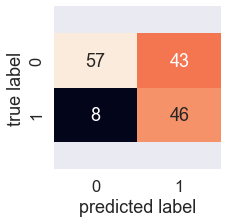

In [56]:
plot_conf_mat(y_test,y_pred)

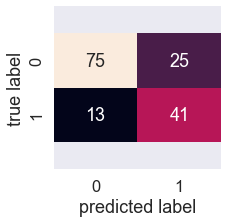

In [57]:
threshold=0.3
y_pred=(y_pred_proba>0.3).astype(float)
plot_conf_mat(y_test,y_pred)

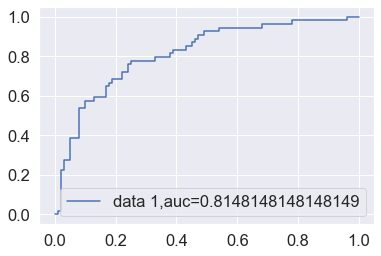

In [58]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [59]:
###########################

In [60]:
df = pd.read_table('diabetesdata.txt') #decision bondry çıkarımı
#check data has been read in properly

In [61]:
X=df[['Glucose','BMI']]
y = df['Diabetes']    

In [62]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [63]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [64]:
def plot_dec_boundary(estimator,X,Y,h):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    X=np.array(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\BATIN ÇETİNKAYA\AppData\Local\Temp\ipykernel_6276\1375473593.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


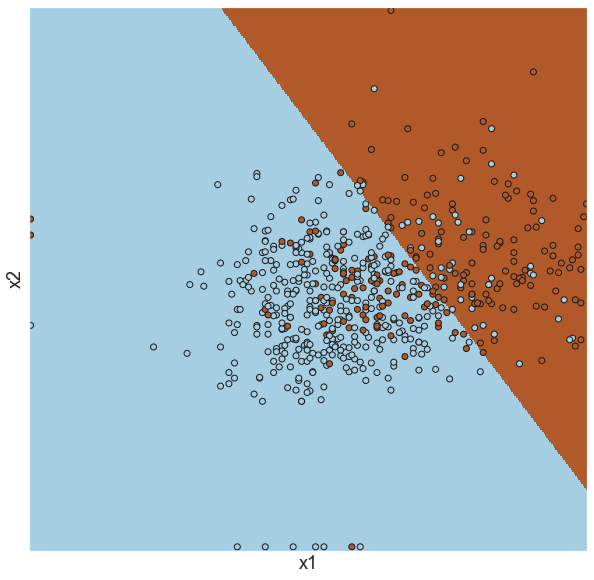

In [68]:
plot_dec_boundary(classifier,X_train,y_train,h=0.25)

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\BATIN ÇETİNKAYA\AppData\Local\Temp\ipykernel_6276\1375473593.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


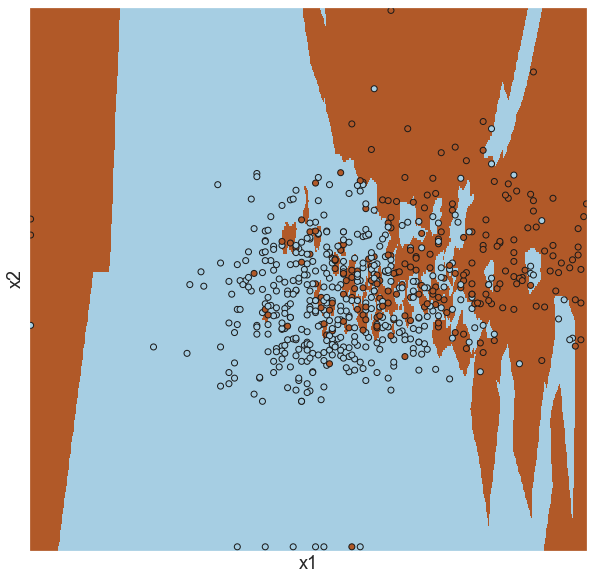

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
plot_dec_boundary(classifier,X_train,y_train,h=0.25)

##knn ile fit edilmiş. decision boundry. logistic reg. lineer kat atıyor. bu farklı